**FINAL PROJECT UAS EDA**

**Ketua Kelompok:**

Nursia (11210940000002) : Bagian SMA & SNA

**Anggota Kelompok:**

Zahra Khotimah (11210940000003) : Bagian Statistik Deskriptif, Data Wrangling & Visualisasi

Febiola Br Tarigan (11210940000015) : Bagian Get data & Prepocessing

Aisyah Nuraini (11210940000030) : Bagian visualisasi Voyant & Gephi

In [ ]:
!pip install --upgrade git+https://github.com/kevctae/twint.git
!pip install nest_asyncio
!pip install unidecode
!pip install Sastrawi
import nltk
nltk.download('punkt')

import warnings; warnings.simplefilter('ignore')
import itertools, re, nltk
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm

factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
sns.set(style="ticks", color_codes=True)
random_state = 170

import twint
import nest_asyncio
import pandas as pd

from google.colab import files

Sastrawi_StopWords_id = factory.get_stop_words()

print(Sastrawi_StopWords_id)
print(len(Sastrawi_StopWords_id))

Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kevctae/twint.git to /tmp/pip-req-build-6a2h11bl
  Running command git clone -q https://github.com/kevctae/twint.git /tmp/pip-req-build-6a2h11bl
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
#get data
nest_asyncio.apply()
config = twint.Config()
config.Hide_output = True
config.Pandas = True
config.Retweets = True
config.Profile_full = True

config.Search = "Final Piala Dunia 2022"

config.Limit = 10000

twint.run.Search(config)
data = twint.storage.panda.Tweets_df
del twint, config, nest_asyncio
print(data.shape)

data.head()

(10016, 38)


,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1608352823690797058,1608352823690797058,1.672296e+12,2022-12-29 06:42:49,+0000,,Ini Imbauan Kapolres Melawi AKBP Sigit Kepada ...,in,[],[],...,,,,,,[],,,,
1,1608352653083381761,1608352653083381761,1.672296e+12,2022-12-29 06:42:08,+0000,,Polres Melawi Bersama Instansi Terkait Melaksa...,in,[],[],...,,,,,,[],,,,
2,1608352504760131586,1608352504760131586,1.672296e+12,2022-12-29 06:41:33,+0000,,Melakukan Pengamanan Nonton Bareng Final Piala...,in,[],[],...,,,,,,[],,,,
3,1608352357770739713,1608352357770739713,1.672296e+12,2022-12-29 06:40:58,+0000,,Pemda Kab. Melawi Menggelar Nonton Bareng Fina...,in,[],[],...,,,,,,[],,,,
4,1608352205400072192,1608352205400072192,1.672296e+12,2022-12-29 06:40:22,+0000,,Polres Melawi Bersama Instansi Terkait Melaksa...,in,[],[],...,,,,,,[],,,,


In [ ]:
data.tail()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
10011,1601338562523582464,1601338562523582464,1.670624e+12,2022-12-09 22:10:39,+0000,,Berharap final Piala Dunia FIFA 2022 ialah Arg...,in,[],[],...,,,,,,[],,,,
10012,1601338502985023488,1601338502985023488,1.670624e+12,2022-12-09 22:10:25,+0000,,LIVE Pertandingan PEREMPAT FINAL Piala Dunia Q...,in,"[jaya365, pialadunia2022, agenpialadunia2022, ...",[],...,,,,,,[],,,,
10013,1601338442713292800,1601338442713292800,1.670624e+12,2022-12-09 22:10:10,+0000,,Final piala dunia Qatar 2022 Prediksi Portuga...,in,[],[],...,,,,,,[],,,,
10014,1601337916516552704,1601337116859912192,1.670624e+12,2022-12-09 22:08:05,+0000,,"Next lawan Kroasia, si pemilik tembok Cina; Li...",in,[],[],...,,,,,,[],,,,
10015,1601337449606967296,1601337449606967296,1.670624e+12,2022-12-09 22:06:14,+0000,,RESMI Semi-final Piala Dunia 2022: 🇦🇷 ARGENTI...,in,[fifaworldcup],[],...,,,,,,[],,,,


##Prepocessing

In [ ]:
#Cek data yang berisi NaN
data.isna().sum()

id                 0
conversation_id    0
created_at         0
date               0
timezone           0
place              0
tweet              0
language           0
hashtags           0
cashtags           0
user_id            0
user_id_str        0
username           0
name               0
day                0
hour               0
link               0
urls               0
photos             0
video              0
thumbnail          0
retweet            0
nlikes             0
nreplies           0
nretweets          0
quote_url          0
search             0
near               0
geo                0
source             0
user_rt_id         0
user_rt            0
retweet_id         0
reply_to           0
retweet_date       0
translate          0
trans_src          0
trans_dest         0
dtype: int64

In [ ]:
#Cek data yang berisi Null
data.isnull().sum()

id                 0
conversation_id    0
created_at         0
date               0
timezone           0
place              0
tweet              0
language           0
hashtags           0
cashtags           0
user_id            0
user_id_str        0
username           0
name               0
day                0
hour               0
link               0
urls               0
photos             0
video              0
thumbnail          0
retweet            0
nlikes             0
nreplies           0
nretweets          0
quote_url          0
search             0
near               0
geo                0
source             0
user_rt_id         0
user_rt            0
retweet_id         0
reply_to           0
retweet_date       0
translate          0
trans_src          0
trans_dest         0
dtype: int64

Dari data di atas diperoleh bahwa data bersih dari Nan dan Null

In [ ]:
#Cek info pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10016 entries, 0 to 10015
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10016 non-null  object 
 1   conversation_id  10016 non-null  object 
 2   created_at       10016 non-null  float64
 3   date             10016 non-null  object 
 4   timezone         10016 non-null  object 
 5   place            10016 non-null  object 
 6   tweet            10016 non-null  object 
 7   language         10016 non-null  object 
 8   hashtags         10016 non-null  object 
 9   cashtags         10016 non-null  object 
 10  user_id          10016 non-null  int64  
 11  user_id_str      10016 non-null  object 
 12  username         10016 non-null  object 
 13  name             10016 non-null  object 
 14  day              10016 non-null  int64  
 15  hour             10016 non-null  object 
 16  link             10016 non-null  object 
 17  urls        

In [ ]:
#Cek nama-nama kolom yang ada pada data
data.columns
#Berdasarkan info, data memiliki 38 kolom

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [ ]:
# Memilih hanya variable dengan tipe tertentu
x = data.select_dtypes(include = ['int64'])
x.head()
#Untuk proses visualisasi numerik

,user_id,day,video,nlikes,nreplies,nretweets
0,948769777853476865,4,0,0,0,0
1,948769777853476865,4,0,0,0,0
2,948769777853476865,4,0,0,0,0
3,948769777853476865,4,0,0,0,0
4,948769777853476865,4,0,0,0,0


In [ ]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [ ]:
#Slicing data untuk visualisasi numerik terhadap nlikes (jumlah like)
y = data[['day', 'username', 'nlikes', 'tweet', 'date']]
y

,day,username,nlikes,tweet,date
0,4,RESMELAWI07,0,Ini Imbauan Kapolres Melawi AKBP Sigit Kepada ...,2022-12-29 06:42:49
1,4,RESMELAWI07,0,Polres Melawi Bersama Instansi Terkait Melaksa...,2022-12-29 06:42:08
2,4,RESMELAWI07,0,Melakukan Pengamanan Nonton Bareng Final Piala...,2022-12-29 06:41:33
3,4,RESMELAWI07,0,Pemda Kab. Melawi Menggelar Nonton Bareng Fina...,2022-12-29 06:40:58
4,4,RESMELAWI07,0,Polres Melawi Bersama Instansi Terkait Melaksa...,2022-12-29 06:40:22
...,...,...,...,...,...
10011,5,elmiyyin,0,Berharap final Piala Dunia FIFA 2022 ialah Arg...,2022-12-09 22:10:39
10012,5,JAYA365OFC,2,LIVE Pertandingan PEREMPAT FINAL Piala Dunia Q...,2022-12-09 22:10:25
10013,5,ridhopangestu8,0,Final piala dunia Qatar 2022 Prediksi Portuga...,2022-12-09 22:10:10
10014,5,beingsaltnlight,0,"Next lawan Kroasia, si pemilik tembok Cina; Li...",2022-12-09 22:08:05


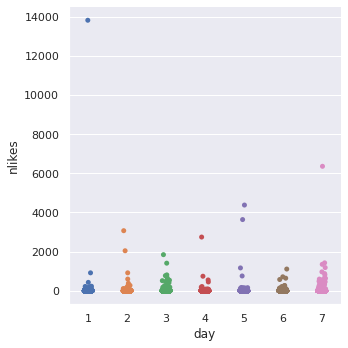

In [ ]:
sns.catplot(x= "day", y= "nlikes", data=data)

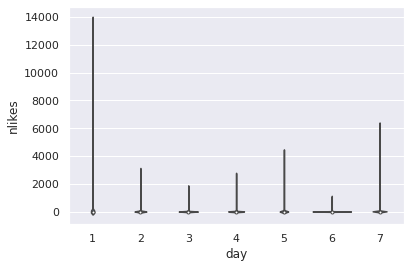

In [ ]:
sns.violinplot(x= "day", y= "nlikes", data=data)

**Interpretasi**

Setelah melakukan visualisasi numerik menggunakan module sns yaitu catplot dan violinplot dengan variabel yang digunakan yaitu 'day' dan 'nlikes', maka dapat kita ambil interpretasi dari data. Topik mengenai Piala Dunia 2022 di Qatar memang sangatlah ramai diperbincangkan pada laman sosial media Twitter. Dalam rentang waktu dari tanggal 9 - 29 Desember 2022 yang kami gunakan, tweet dengan jumlah like tertinggi terdapat pada Day 1 yang menembus angka 14000 like. Dan yang terendah terjadi pada Day 6 dengan jumlah kurang dari 2000 like.

##Statistika Deskriptif

In [ ]:
data.describe(include = 'all')

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
count,10016,10016,1.001600e+04,10016,10016,10016,10016,10016,10016,10016,...,10016,10016,10016,10016,10016,10016,10016,10016,10016,10016
unique,10016,9805,NaN,9746,1,6,9952,20,1901,1,...,1,1,1,1,1,127,1,1,1,1
top,1608352823690797058,1604336972452966400,NaN,2022-12-17 07:00:00,+0000,,Julian Alvarez Nyetel saat Diduetkan bareng Me...,in,[],[],...,,,,,,[],,,,
freq,1,23,NaN,5,10016,10011,7,9603,6368,10016,...,10016,10016,10016,10016,10016,9777,10016,10016,10016,10016
mean,NaN,NaN,1.671198e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,2.711356e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.670624e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.671012e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.671247e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.671378e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe()

,created_at,user_id,day,video,nlikes,nreplies,nretweets
count,1.001600e+04,1.001600e+04,10016.000000,10016.000000,10016.000000,10016.000000,10016.000000
mean,1.671198e+12,6.406246e+17,4.725439,0.244409,10.284744,1.469449,1.950978
std,2.711356e+08,6.974009e+17,2.121496,0.429758,176.994508,29.977440,40.576161
min,1.670624e+12,1.002434e+07,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.671012e+12,1.326001e+08,3.000000,0.000000,0.000000,0.000000,0.000000
50%,1.671247e+12,2.985307e+09,5.000000,0.000000,0.000000,0.000000,0.000000
75%,1.671378e+12,1.423937e+18,7.000000,0.000000,1.000000,0.000000,0.000000
max,1.672296e+12,1.605389e+18,7.000000,1.000000,13818.000000,1873.000000,3859.000000


**Interpretasi**

Dari tabel di atas, kita peroleh informasi bahwa terdapat >10000 data dari day 1 sampai day 7. Like terbanyak sejumlah 13.818, reply terbanyak sejumlah 1.873 dan retweet terbanyak sejumlah 3.859. Untuk rata-rata like yaitu 10,2998, rata-rata reply 1,4719, dan rata-rata retweet 1,9538. Dari informasi ini dapat kita ketahui bahwa antusias masyrakat terhadap Final Piala Dunia 2022 cukup besar dengan like mencapai lebih dari 13.000.

In [ ]:
data[['nlikes', 'nreplies', 'nretweets']].describe(include='all')

,nlikes,nreplies,nretweets
count,10016.000000,10016.000000,10016.000000
mean,10.284744,1.469449,1.950978
std,176.994508,29.977440,40.576161
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,13818.000000,1873.000000,3859.000000


In [ ]:
data[['username', 'day', 'tweet', 'nreplies', 'nlikes', 'nretweets']].max()

username                                                zzhbbn
day                                                          7
tweet        🤣🤣🤣🤣🤣🤣  HATI SERASA IKUT MENANG  SEMOGA FINAL ...
nreplies                                                  1873
nlikes                                                   13818
nretweets                                                 3859
dtype: object

**Interpretasi**

Dari data tabel statistika deskriptif sebelumnya, dengan menggunakan variabel 'nreplies', 'nlikes', dan 'nretweets' maka dapat dilihat bahwa terdapat max tweet dengan 13818 like, 1873 reply, dan 3859 retweet. Untuk mengecek data tersebut, kita slicing data dengan menambahkan variabel 'username', 'day', dan 'tweet'. Didapat bahwa data max tersebut adalah milik pengguna Twitter dengan username  zzhbbn yang ditweet pada hari ke-7, zzhbbn mengetweet "🤣🤣🤣🤣🤣🤣 HATI SERASA IKUT MENANG SEMOGA FINAL ...". Tweet tersebut mendapatkan 13815 like, 1873 reply, dan diretweet sebanyak 3859 kali.

##Data Wrangling

In [ ]:
ratarata = data.groupby(data['day']).mean()[['nlikes','nreplies','nretweets']]
ratarata = ratarata.rename({'nlikes': 'mean_like','nreplies': 'mean_replies','nretweets':'mean_retweets'}, axis=1)
ratarata

,mean_like,mean_replies,mean_retweets
day,,,
1,17.607861,1.013711,4.438757
2,12.758777,1.015855,1.870895
3,11.852327,0.892456,2.105939
4,6.455349,0.650752,0.923077
5,13.560718,2.034847,1.526927
6,5.090731,2.051567,1.279373
7,9.353754,1.820295,1.872133


**Interpretasi**

Dari hasil tabel di atas, kita peroleh informasi bahwa rata-rata like, reply dan retweet terendah berada pada day 4. Sedangkan, rata-rata tertinggi like berada pada day 1 dengan nilai 17.6, untuk reply berada pada day 6 dengan nilai 2.055, dan retweet berada pada day 1 dengan nilai 4.438.

##Visualisasi

In [ ]:
CT = pd.crosstab(index=data["day"], columns=data["nlikes"])
CT

nlikes,0,1,2,3,4,5,6,7,8,9,...,1410,1426,1845,2044,2744,3069,3637,4379,6358,13818
day,,,,,,,,,,,,,,,,,,,,,
1,703,150,50,26,24,19,11,11,7,10,...,0,0,0,0,0,0,0,0,0,1
2,514,120,57,33,18,14,11,8,10,7,...,0,0,0,1,0,1,0,0,0,0
3,751,160,79,40,31,22,15,8,10,9,...,1,0,1,0,0,0,0,0,0,0
4,761,132,69,27,28,19,8,14,14,5,...,0,0,0,0,1,0,0,0,0,0
5,600,137,53,32,25,17,12,7,4,6,...,0,0,0,0,0,0,1,1,0,0
6,1037,219,76,33,19,17,20,10,7,13,...,0,0,0,0,0,0,0,0,0,0
7,2078,406,165,92,53,46,29,23,24,24,...,0,1,0,0,0,0,0,0,1,0


**Interpretasi**

Dari hasil tabel di atas kita peroleh bahwa pada day 1 terdapat satu tweet yang memiliki like sebanyak 13818, bisa kita simpulkan bahwa antusiasme masyarakat terhadap final piala dunia 2022 sangat besar di day 1. Begitupun, dengan antusiasme masyarakat di day 7 masih cukup tinggi dengan adanya satu tweet yang memiliki jumlah like sebanyak 6358.


In [ ]:
df = data.set_index('date')
df.head()

,id,conversation_id,created_at,timezone,place,tweet,language,hashtags,cashtags,user_id,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
date,,,,,,,,,,,,,,,,,,,,,
2022-12-29 06:42:49,1608352823690797058,1608352823690797058,1.672296e+12,+0000,,Ini Imbauan Kapolres Melawi AKBP Sigit Kepada ...,in,[],[],948769777853476865,...,,,,,,[],,,,
2022-12-29 06:42:08,1608352653083381761,1608352653083381761,1.672296e+12,+0000,,Polres Melawi Bersama Instansi Terkait Melaksa...,in,[],[],948769777853476865,...,,,,,,[],,,,
2022-12-29 06:41:33,1608352504760131586,1608352504760131586,1.672296e+12,+0000,,Melakukan Pengamanan Nonton Bareng Final Piala...,in,[],[],948769777853476865,...,,,,,,[],,,,
2022-12-29 06:40:58,1608352357770739713,1608352357770739713,1.672296e+12,+0000,,Pemda Kab. Melawi Menggelar Nonton Bareng Fina...,in,[],[],948769777853476865,...,,,,,,[],,,,
2022-12-29 06:40:22,1608352205400072192,1608352205400072192,1.672296e+12,+0000,,Polres Melawi Bersama Instansi Terkait Melaksa...,in,[],[],948769777853476865,...,,,,,,[],,,,


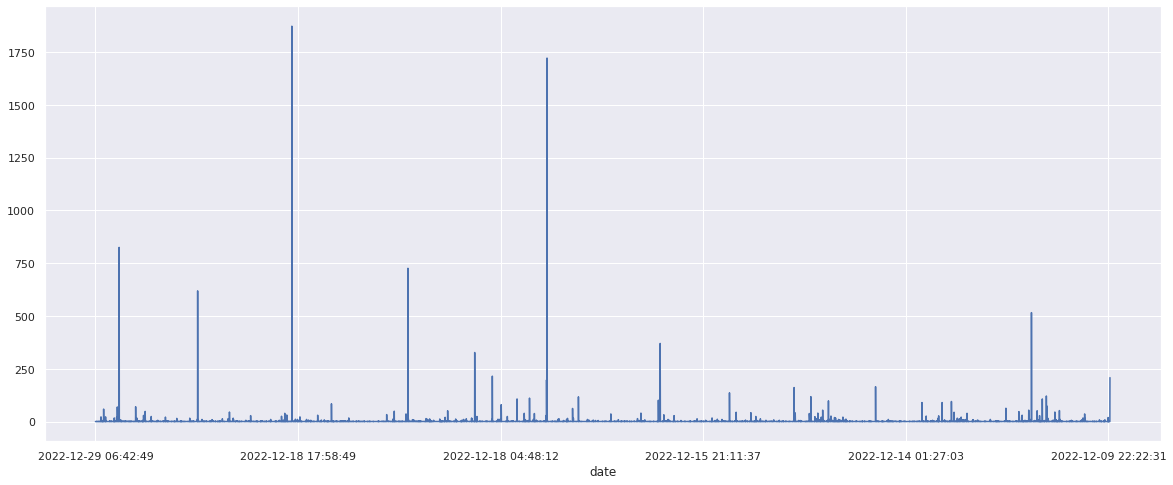

In [ ]:
df['nreplies'].plot(figsize=(20,8))

**Interpretasi**

Grafik diatas menggunakan matplotlib dengan ukuran 20x8, memakai variabel 'nreplies', dan dengan rentang waktu dari 2022-12-09 22:22:31 sampai 2022-12-29 06:42:49. Dapat dilihat terdapat informasi bahwa pada rentang waktu 2022-12-18 17:58:49 sampai 2022-12-29 06:42:49 terdapat jumlah reply tertinggi lebih dari 1750 reply. Menurut kami, kemungkinan tweet yang direply mengenai final piala dunia yaitu Argentina vs Prancis, yang kebetulan diselenggarakan pada 18 Desember 2022 pukul 22.00 WIB.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f027a2a1d60>,
      dtype=object)

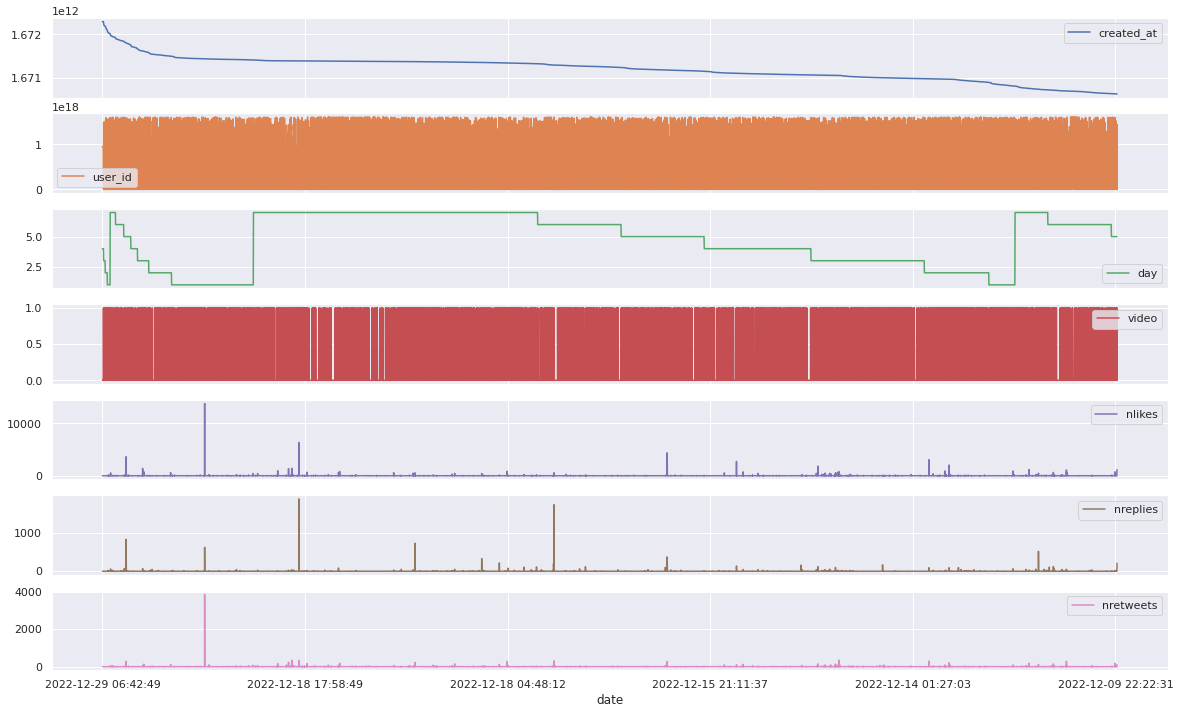

In [ ]:
df.plot(subplots= True, figsize=(20,12))

**Interpretasi**

Sama seperti grafik sebelumnya, selanjutnya dapat kita coba terhadap variable lain menggunakan matplotlib dengan ukuran 20x12. Dapat kita ambil informasi penting yaitu pada jumlah like, reply, dan retweet paling tinggi terjadi pada rentang waktu 2022-12-18 17:58:49 sampai 2022-12-29 06:42:49. Maka kemungkinan yang terjadi tweet tersebut masih mengenai seputar final piala dunia atau closing ceremony Piala Dunia 2022 Qatar.

##SMA (Social Media Analytics)

In [ ]:
df = data[['tweet']]
df.at[0, 'tweet']

'Ini Imbauan Kapolres Melawi AKBP Sigit Kepada Warga yang Menghadiri Acara Nonton Bareng Final Piala Dunia 2022 yang Digelar Pemda Kab.\xa0Melawi  https://t.co/2p78NyAlgE'

In [ ]:
#clean tweet
def cleanText(txt):
    docx = unidecode(unescape(txt.lower().strip()))
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    docx = re.sub(urlPattern,' ', docx) # Remove links
    docx = re.sub(r'[^\w]', ' ', docx) # Remove Symbol, keep "_" ... recommended
    Tokens = TextBlob(docx).words # Tokenisasi
    docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2]) # Stopwords filtering
    docx = stemmer.stem(docx)

    slangS = {'pildun' : 'piala dunia', 'trophi' : 'trofi', 'tropi' : 'trofi','yg':'yang', 'dgn':'dengan', 'tdk' : 'tidak', 'gk':'tidak', 'gak':'tidak',
              'moga':'semoga', 'krn':'karena', 'spt':'seperti', 'tau':'tahu', 'knp':'kenapa', 'skrg':'sekarang', 'dpt':'dapat', 'jd':'jadi',
              'udah':'sudah', 'liat':'lihat', 'aja':'saja', 'sbg' : 'sebagai', 'jgn':'jangan', 'jg':'juga', 'nmn': 'namun'} #Penanganan slang dan singkatan
    T = docx
    T = TextBlob(T).words
    for i,t in enumerate(T):
      if t in slangS.keys():
        T[i] = slangS[t]
    return docx

data['clean_tweet'] = ''
for idx, post in tqdm(data.iterrows()):
    data.at[idx, 'clean_tweet'] = cleanText(post.tweet)

data.head()

10016it [16:14, 10.27it/s]


,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,clean_tweet
0,1608352823690797058,1608352823690797058,1.672296e+12,2022-12-29 06:42:49,+0000,,Ini Imbauan Kapolres Melawi AKBP Sigit Kepada ...,in,[],[],...,,,,,[],,,,,imbau kapolres lawi akbp sigit warga hadir aca...
1,1608352653083381761,1608352653083381761,1.672296e+12,2022-12-29 06:42:08,+0000,,Polres Melawi Bersama Instansi Terkait Melaksa...,in,[],[],...,,,,,[],,,,,polres lawi sama instansi kait laksana aman no...
2,1608352504760131586,1608352504760131586,1.672296e+12,2022-12-29 06:41:33,+0000,,Melakukan Pengamanan Nonton Bareng Final Piala...,in,[],[],...,,,,,[],,,,,laku aman nonton bareng final piala dunia 2022...
3,1608352357770739713,1608352357770739713,1.672296e+12,2022-12-29 06:40:58,+0000,,Pemda Kab. Melawi Menggelar Nonton Bareng Fina...,in,[],[],...,,,,,[],,,,,pemda kab lawi gelar nonton bareng final piala...
4,1608352205400072192,1608352205400072192,1.672296e+12,2022-12-29 06:40:22,+0000,,Polres Melawi Bersama Instansi Terkait Melaksa...,in,[],[],...,,,,,[],,,,,polres lawi sama instansi kait laksana aman no...


In [ ]:
#Slicing data untuk ambil clean tweet saja
data2 = data[['clean_tweet']]
#Cek ukuran data dan jumlah duplikat
print(data2.shape)
print(data2.duplicated().sum())

(10016, 1)
1477


In [ ]:
#Menghapus duplikat data
data2.drop_duplicates(inplace = True)
print(data2.duplicated().sum())
print(data2.shape)

0
(8539, 1)


In [ ]:
#Save hasil text yang sudah dibersihkan ke file Text
data2[['clean_tweet']].to_csv('cleaned_tweet.txt', index=False, encoding='utf8', header=False)
files.download('cleaned_tweet.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Save hasil text yang sudah dibersihkan ke file csv
data2[['clean_tweet']].to_csv('cleaned_tweet.csv', index=False, encoding='utf8', header=False)
files.download('cleaned_tweet.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data3 = data[['username', 'clean_tweet']]
data3.tail()

,username,clean_tweet
10011,elmiyyin,harap final piala dunia fifa 2022 ialah argent...
10012,JAYA365OFC,live tanding empat final piala dunia qatar 202...
10013,ridhopangestu8,final piala dunia qatar 2022 prediksi portugal...
10014,beingsaltnlight,next lawan kroasia milik tembok cina livakovic...
10015,FaktaSepakbola,resmi semi final piala dunia 2022 argentina kr...


In [ ]:
#Save hasil text yang sudah dibersihkan ke file csv
data3[['username', 'clean_tweet']].to_csv('cleaned_tweet_username.csv', index=False, encoding='utf8', header=False)
files.download('cleaned_tweet_username.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##SNA (Social Network Analytics)

In [ ]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.dic
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install unidecode twython beautifulsoup4 pyLDAvis json_lines
    !pip install networkx scipy
    !pip install --upgrade tweepy
    !python -m spacy download xx_ent_wiki_sm
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2022-12-29 08:56:59--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8834 (8.6K) [text/plain]
Saving to: ‘taudataEDA02CTA.py.1’

taudataEDA02CTA.py. 100%[===================>]   8.63K  --.-KB/s    in 0s      

2022-12-29 08:57:00 (83.2 MB/s) - ‘taudataEDA02CTA.py.1’ saved [8834/8834]

--2022-12-29 08:57:00--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [ ]:
# import beberapa module yg dibutuhkan di WorkShop ini:
import graphviz, warnings; warnings.simplefilter('ignore')
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, networkx as nx
import random
import taudataEDA02CTA as tau2
import graphviz, taudata_sna as tau
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()
from graphviz import Digraph
import json, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from tqdm import tqdm

seed = 123
random.seed(seed)
np.random.seed(seed)
"Done"

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


'Done'

In [ ]:
users = data.username.to_list()
tweets = data.tweet.to_list()
print( users[:7] )

['RESMELAWI07', 'RESMELAWI07', 'RESMELAWI07', 'RESMELAWI07', 'RESMELAWI07', 'RESMELAWI07', 'RESMELAWI07']


In [ ]:
print(tweets[:3])

['Ini Imbauan Kapolres Melawi AKBP Sigit Kepada Warga yang Menghadiri Acara Nonton Bareng Final Piala Dunia 2022 yang Digelar Pemda Kab.\xa0Melawi  https://t.co/2p78NyAlgE', 'Polres Melawi Bersama Instansi Terkait Melaksanakan Pengamanan Nonton Bareng Final Piala Dunia 2022 yang Digelar Oleh Pemda Kab.\xa0Melawi  https://t.co/GmcOji6WdS', 'Melakukan Pengamanan Nonton Bareng Final Piala Dunia 2022, Ini Imbauan Kapolres Melawi AKBP Sigit Kepada\xa0Warga  https://t.co/5LRIgRsw9P']


In [ ]:
G = nx.Graph() # Graph Kosong Baru

G.add_nodes_from(users)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  3272
Banyak Edges =  0


In [ ]:
import re

t = "Jadwal Quartel Final Piala Dunia Qatar 2022 @FIFAWorldCup"
mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)

mentionS

['FIFAWorldCup']

In [ ]:
for usr, t in zip(users, tweets):
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentionS:
        if "." not in mention: #skipping emails
            G.add_edge(usr, mention)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  3645
Banyak Edges =  776


In [ ]:
G.nodes()

NodeView(('RESMELAWI07', 'bolacomID', 'ofit_dj', 'kdasntnlv', 'GOAL_ID', 'Anantha_aprl', 'detikcom', 'BolaSportcom', 'tribunSUPERBALL', 'bemyheal', 'detiksport', 'garinp4', 'herman__joseph', 'mas__iko', 'Nova88Indo', 'KompasBola', 'tauberitamedia', 'BeniFirdaus91', 'asteatwo', 'Ditajagpp', 'shall0wlittleb', 'syoksyoksyok', 'indozonemedia', 'GerakanPis', 'rentmobiljogja_', 'mariobolaparlay', 'VIVAcoid', 'idntimes', '_____r__baraas', '10ahmadhafidz', 'PemdaKabJember', 'tvOneNews', 'Bunga_gl', 'Aktualkan', 'SportlineIDN', 'timescoid', 'StartingSportID', 'okezonenews', 'bolaskorcom', 'VIVAbola', 'ekingsnews', 'indosportdotcom', 'indoinsidenews', 'Prambors', 'ShofwanMuis', 'InfoSeriyes', 'PedomanRakyat', 'rzky734', 'BandarBolaTop', 'ervin_larasati', 'medioclubID', 'sakatadotid', 'AssaMaulana', 'sunyi_senyap65', 'ArdanNews', 'kerangkapikir', 'kumparan', 'fajaronline', 'Pulpendid', 'smnnone', 'beritaindo', 'Doneeyyy', 'Football5star', 'Arenanews1', 'kopimanisyo', 'serambinews', 'MySumatera', 

In [ ]:
G.edges()

EdgeView([('bolacomID', 'SboRobot'), ('detikcom', 'pancongenjoyer'), ('detikcom', 'dedifrozenfood'), ('indozonemedia', 'karimbenzema'), ('idntimes', 'castro1021'), ('okezonenews', 'TjahjoLoet'), ('okezonenews', 'partaiperindo'), ('okezonenews', 'ManiakaSang'), ('okezonenews', 'warumkieell'), ('okezonenews', 'DhontRamadan'), ('okezonenews', 'ArdiHariadi2'), ('ekingsnews', 'ekingsnews'), ('ShofwanMuis', 'garagarabola'), ('InfoSeriyes', 'yennywahid'), ('medioclubID', 'novem_rossifumi'), ('sunyi_senyap65', 'R'), ('sunyi_senyap65', 'aniesbaswedan'), ('serambinews', 'serambinews'), ('serambinews', 'sharenewsaceh'), ('turius_w', 'fredellbenn'), ('turius_w', 'theirents'), ('turius_w', 'WisnuAndreas7'), ('FairuzFZ29', 'Info'), ('FairuzFZ29', 'idextratime'), ('tribunnews', 'tribunnews'), ('tribunnews', 'gunawancrypto'), ('tribunnews', 'ManiakaSang'), ('tribunnews', 'Tribun_Manado'), ('tribunnews', '123Begadang'), ('tribunnews', 'DuduJait1'), ('tribunnews', 'NewsmakerTribun'), ('tribunnews', 'Tri

In [ ]:
pos = nx.spiral_layout(G)
pos

{'RESMELAWI07': array([-6.98074548e-05,  7.87854804e-04]),
 'bolacomID': array([0.00018897, 0.00088231]),
 'ofit_dj': array([0.00035158, 0.00114279]),
 'kdasntnlv': array([0.0003414 , 0.00150472]),
 'GOAL_ID': array([0.00011748, 0.00187372]),
 'Anantha_aprl': array([-0.00031532,  0.00214318]),
 'detikcom': array([-0.00090424,  0.00221461]),
 'BolaSportcom': array([-0.00155507,  0.00201768]),
 'tribunSUPERBALL': array([-0.00214628,  0.0015261 ]),
 'bemyheal': array([-0.002549  ,  0.00076701]),
 'detiksport': array([-0.00264952, -0.00017847]),
 'garinp4': array([-0.00237096, -0.00118369]),
 'herman__joseph': array([-0.00169047, -0.00209332]),
 'mas__iko': array([-0.0006488 , -0.00274621]),
 'Nova88Indo': array([ 0.00064951, -0.00300113]),
 'KompasBola': array([ 0.0020462 , -0.00276138]),
 'tauberitamedia': array([ 0.00334858, -0.00199452]),
 'BeniFirdaus91': array([ 0.00435573, -0.00074377]),
 'asteatwo': array([0.00488805, 0.00087123]),
 'Ditajagpp': array([0.00481603, 0.00266501]),
 's

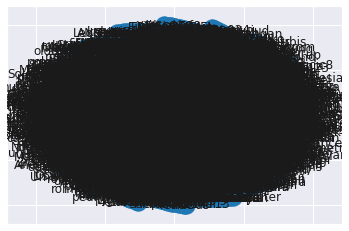

In [ ]:
# Menggambar
nx.draw_networkx_nodes(G, pos) # ini sekedar menggambar noktah vertex
nx.draw_networkx_labels(G,pos) # ini kemudian memberikan label di setiap vertex pada langkah sebelumnya
nx.draw_networkx_edges(G,pos) # ini menggambar edge di graph G
plt.show()
#Gambar tidak jelas maka kita gunakan Gephi

#Visualisasi Gephi

##Visualisasi Voyant

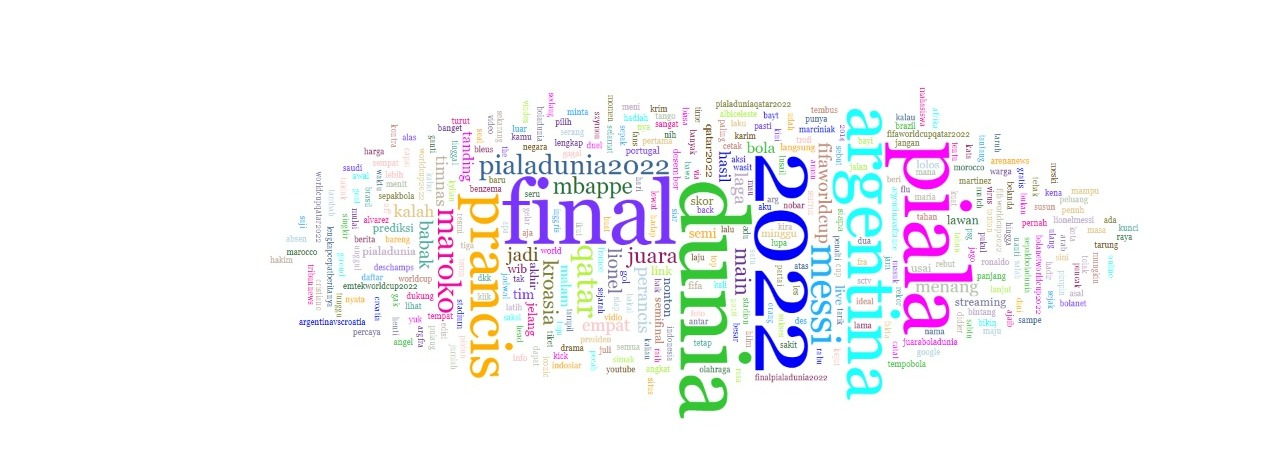

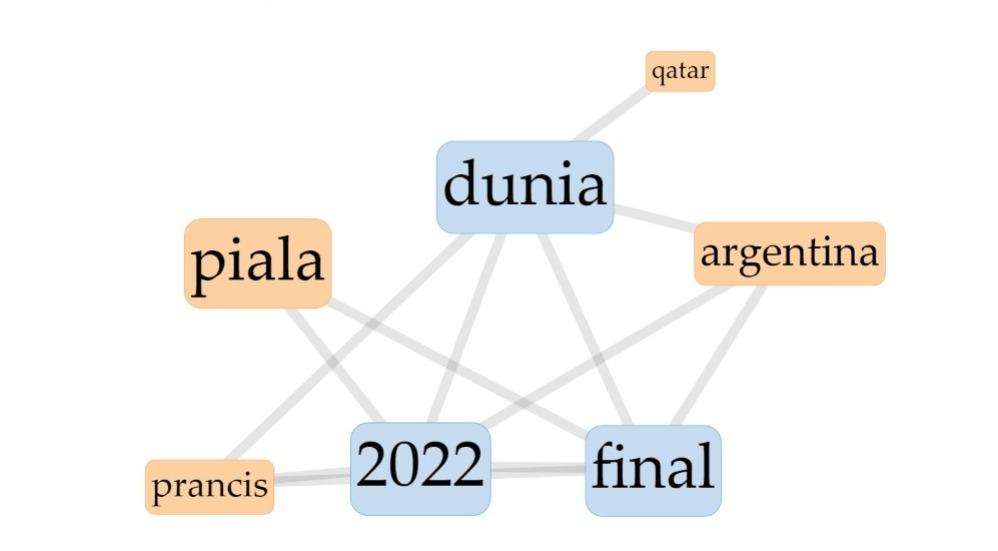

**Interpretasi**

Dari visualisasi data diatas, didapat  informasi mengenai piala dunia Qatar 2022. Dimana informasi tersebut menarik perhatian bagi pengguna twitter. Topik yang paling banyak di perbincangkan adalah mengenai final, argentina dan prancis, hal ini menunjukkan bahwa banyak di antara uephoria piala dunia sampai pada  pengguna twitter Indonesia. Argentina merupakan topik yang paling banyak di perbi ncangkan di twiter sebagai pemenang dari piala dunia Qatar 2022 sehingga negara tersebut trending di Twitter Indonesia. Kemudian topik yang banyak dibahas selanjutnya adalah final. Final antara Argentina dan Prancis ramai diperbincangkan , apalagi kalau bukan kemenangan Argentina dan kekalahan Prancis.